In [ ]:
!git clone https://github.com/PatristicTextArchive/analyse_data

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

# Keywords in context (KWIC)

## Load data

In [2]:
# load data
df = pd.read_csv('/content/analyse_data/data/severian_plaintext.csv')


In [3]:
# filter to only greek texts
filtered_df = df[df['lang'] == 'grc']

## Define function to get keyword in context

In [4]:
def kwic_search(keyword,context,dataframe):
    '''
    Search for keyword in context of x words in dataframe.
    Print results and output a dict with position of results 
    relative to file length for visualization later
    '''
    list_position = {}

    for index, row in dataframe.iterrows():
        text_id = row['urn']
        content = row['text']
        tokens = content.lower().split()
        indices = [i for i, x in enumerate(tokens) if re.search(keyword,x)]
        positions = []
        for entry in indices:
            context_before = tokens[max(0, entry - context):entry]
            context_after = tokens[entry + 1:min(len(tokens), entry + context + 1)]
            print('{:<40s}{:>40s}{:^20s}{:<32s}'.format(text_id+" (Pos.: "+str(entry)+" / "+'{:.0%}'.format((entry/len(tokens)))+" des Textes):"," ".join(context_before),tokens[entry]," ".join(context_after)))
            perc = entry/len(tokens)*100
            positions.append(perc)
        list_position[text_id] = positions 
    return list_position

## Do search

In [5]:
keyword = "προκείμενον"
kwic = kwic_search(keyword,5,filtered_df)

pta0001.pta001.pta-grc1 (Pos.: 1415 / 36% des Textes):              λύκοι ἅρπαγες. ἀλλʼ εἰς τὸ    προκείμενον     ἐπανέλθωμεν. θέλεις ἰδεῖν, ἀδελφέ, ὅσον
pta0001.pta001.pta-grc1 (Pos.: 2184 / 56% des Textes):               σποδός; ἀλλὰ πάλιν εἰς τὸ    προκείμενον     ἐπανέλθωμεν. ὁ θεὸς ἔκτισε τὸν  
pta0001.pta002.pta-grc1 (Pos.: 3363 / 56% des Textes):                   κρίνει. ἵνα δὲ εἰς τὸ    προκείμενον     ἐπανέλθωμεν πάλιν, ἃ ἤκουσεν ἰσραήλ,
pta0001.pta004.pta-grc1 (Pos.: 1727 / 23% des Textes):                    ἡ ἀγάπη. ἀλλʼ εἰς τὸ    προκείμενον     ἐπανέλθωμεν. ἔρχεται ἡσαΐας πάλιν. τὸ
pta0001.pta004.pta-grc1 (Pos.: 1906 / 25% des Textes):        πνεῦμα ἀποκαλύψεως; ἀλλὰ πρὸς τὸ    προκείμενον     ἐπανέλθωμεν. ὅπου δεῖ μαθεῖν τὰ 
pta0001.pta004.pta-grc1 (Pos.: 2332 / 31% des Textes):              γνώμης ἀγαθῆς. ἀλλʼ εἰς τὸ    προκείμενον     ἐπανέλθωμεν. ἔλαβεν ὁ διδάσκων πνεῦμα
pta0001.pta006.pta-grc1 (Pos.: 4274 / 86% des Textes):                 νόει τὴν λαμπάδα, τὸ δὲ   

### Visualize as scatterplot

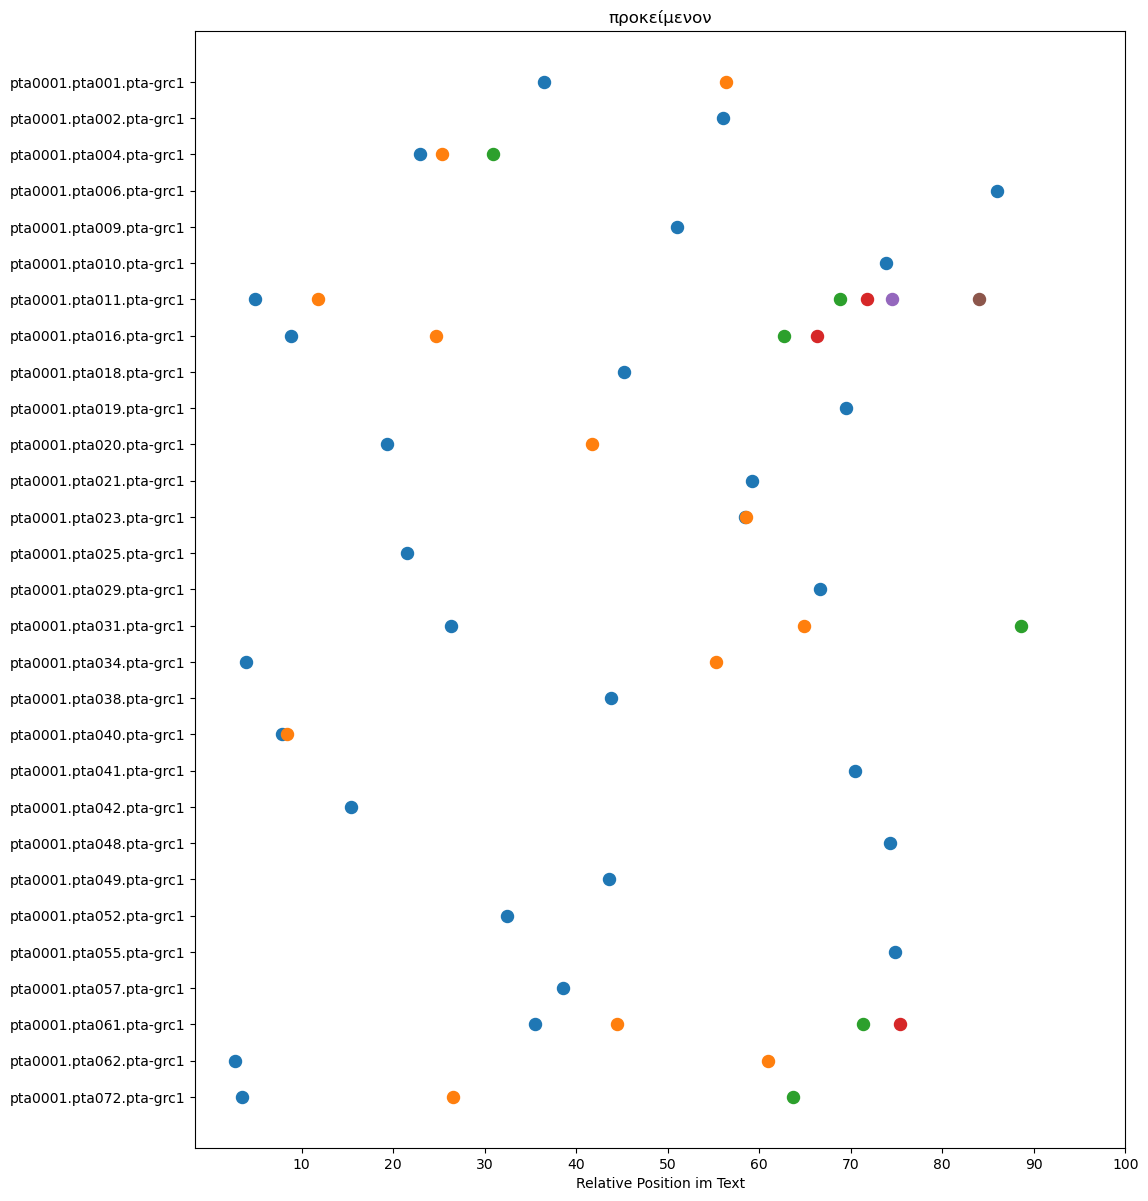

In [6]:
df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in sorted(kwic.items(),reverse=True)]))
df1 = df.transpose().dropna(how='all') # transpose and drop empty entries
## plot
# Adjust figure size based on the number of entries
fig_width = 2 * len(df1.columns)
fig_height = len(df1) / 2

plt.figure(figsize=(fig_width,fig_height))
for en in df1:
    plt.scatter(df1[en],df1.index,marker=".",s=300)
plt.xlabel('Relative Position im Text')
plt.xticks(np.arange(10, 110, step=10))
plt.title(keyword)
plt.show()